<a href="https://colab.research.google.com/github/pampamlopes/ai_unsupervised/blob/main/KMEANS_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from numpy import random
from scipy.spatial.distance import cdist
import random
import math as mat

In [ ]:
#lendo o dataset
df = pd.read_csv('dados.csv')

In [ ]:
#visualindo dados do dataset
df.head(10)

,county,cases,deaths
0,Abbeville,84,0
1,Acadia,741,21
2,Accomack,116,0
3,Ada,4264,41
4,Adair,325,8
5,Adams,5003,101
6,Addison,470,0
7,Aiken,298,10
8,Alachua,1763,0
9,Alamance,209,0


In [ ]:
df.shape

(1570, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   county  1570 non-null   object
 1   cases   1570 non-null   int64 
 2   deaths  1570 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 36.9+ KB


In [ ]:
df.describe()

,cases,deaths
count,1570.000000,1570.000000
mean,2633.903822,69.952229
std,24352.089822,842.722792
min,1.000000,0.000000
25%,34.000000,0.000000
50%,133.500000,0.000000
75%,632.750000,17.000000
max,868824.000000,31887.000000


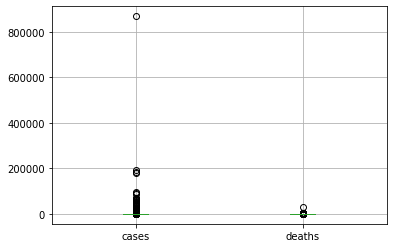

In [ ]:
#detectando outliers
df[['cases', 'deaths']].boxplot()

In [ ]:
#usando o Z-score para identificar possiveis outliers
from scipy import stats
z = np.abs(stats.zscore(df['cases'].values))
threshold = 3
result=np.where(z > threshold)

df_outlier=df.iloc[result[0]]
df_outlier

,county,cases,deaths
338,Cook,97593,2079
979,Nassau,181164,4026
995,New York City,868824,31887
1350,Suffolk,182515,2421
1434,Unknown,92987,3643
1491,Wayne,87378,3236
1502,Westchester,191176,1936


In [ ]:
#deletando a linha 995 com outlier
df.drop(995, inplace=True)

In [ ]:
X = df.iloc[:, 1:3].values
X

array([[ 84,   0],
       [741,  21],
       [116,   0],
       ...,
       [  8,   0],
       [216,   0],
       [  4,   0]])

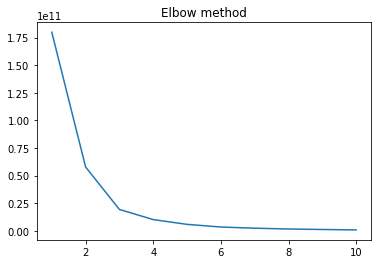

In [ ]:
#Elbow method
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init= 20)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.show()

In [ ]:
#Aplicando o Kmeans com K=3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10)
clusters = kmeans.fit_predict(X)
clusters

dados = kmeans.cluster_centers_
print (f'Formato {dados}')

Formato [[1.04625339e+03 2.50627020e+01]
 [5.75261053e+04 1.62015789e+03]
 [1.84951667e+05 2.79433333e+03]]


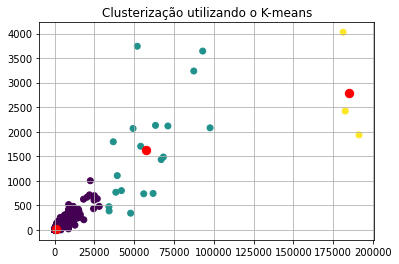

In [ ]:
plt.scatter(df['cases'], df['deaths'], c = clusters)
plt.title("Clusterização utilizando o K-means")
plt.grid()

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='red')
plt.show()

In [ ]:
#Incluindo os labels no dataset
df['Cluster'] = clusters
df.head()

,county,cases,deaths,Cluster
0,Abbeville,84,0,0
1,Acadia,741,21,0
2,Accomack,116,0,0
3,Ada,4264,41,0
4,Adair,325,8,0


In [ ]:
cluster_2 = df['Cluster'] == 2
df[cluster_2]

,county,cases,deaths,Cluster
979,Nassau,181164,4026,2
1350,Suffolk,182515,2421,2
1502,Westchester,191176,1936,2
